In [142]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd

In [143]:
from sklearn.metrics import r2_score

# Linear Model to fit the curve

In [286]:
training_subset_length = 450
total_data_length = round(training_subset_length/10) +20
alpha = 0.05

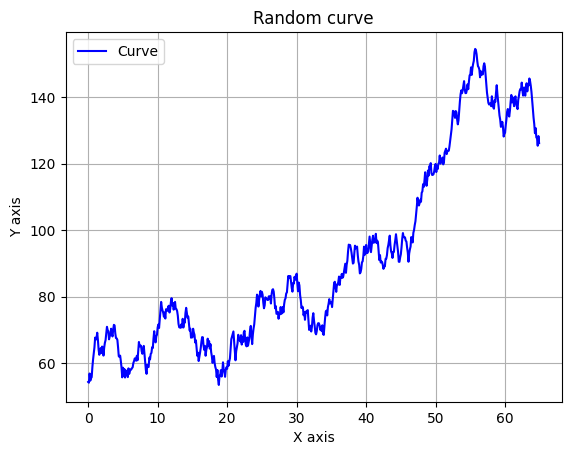

In [290]:
X = np.arange(0, total_data_length, 0.1).reshape(-1, 1)
Y = []
y = rd.randint(50, 100)
for i in range(len(X)):
    y += rd.uniform(-3, 3)
    Y.append(y)


plt.plot(X, Y, color='b', label='Curve')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Random curve")
plt.grid()
plt.legend()
plt.show()


In [291]:
from sklearn.linear_model import LinearRegression

In [292]:
print(len(X))
print(X.shape)

650
(650, 1)


In [293]:
LR = LinearRegression()
LR.fit(X[:training_subset_length], Y[:training_subset_length])

LinearRegression()

In [294]:
a = LR.coef_
b = LR.intercept_

y_pred_LR = LR.predict(X)

print(f"R2 score on the trained part of the curve of {r2_score(Y[:training_subset_length], y_pred_LR[:training_subset_length])}")
print(f"R2 score on the untrained part of the of {r2_score(Y[training_subset_length:], y_pred_LR[training_subset_length:])}")
print(f"Coefficient: {a}")
print(f"Intercept: {b}")

R2 score on the trained part of the curve of 0.6508444530012565
R2 score on the untrained part of the of -3.53349969571091
Coefficient: [0.7275773]
Intercept: 57.891600027463156


### Adding a prediction interval

In [295]:
# Prediction region

res = Y - y_pred_LR
qt = np.quantile(res, 1 - alpha)

# Need to check type of qt

upper_LR = [y_pred_LR[i] + qt if qt > 0 else y_pred_LR[i] - qt for i in range(len(y_pred_LR))]
lower_LR = [y_pred_LR[i] - qt if qt > 0 else y_pred_LR[i] + qt for i in range(len(y_pred_LR))]

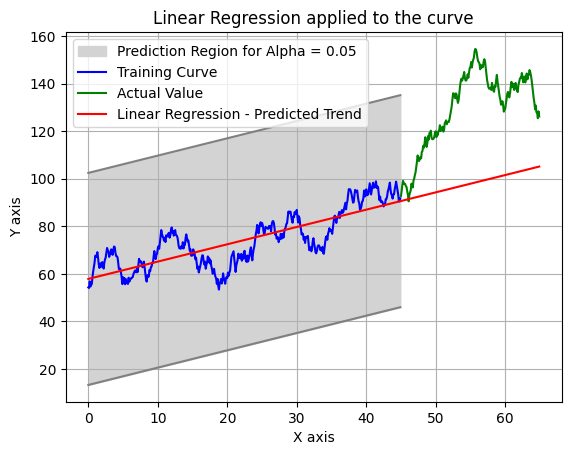

In [296]:
lr = []
for i in range(len(X)):
    lr.append(a*X[i] + b)

plt.plot(X[:training_subset_length], upper_LR[:training_subset_length], color='grey')
plt.plot(X[:training_subset_length], lower_LR[:training_subset_length], color='grey')
plt.fill_between(X.reshape(-1)[:training_subset_length], upper_LR[:training_subset_length], lower_LR[:training_subset_length], color='lightgrey', label=f'Prediction Region for Alpha = {alpha}')
plt.plot(X[:training_subset_length], Y[:training_subset_length], color='b', label='Training Curve')
plt.plot(X[training_subset_length:], Y[training_subset_length:], color='g', label='Actual Value')
plt.plot(X, lr, color='r', label='Linear Regression - Predicted Trend')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Linear Regression applied to the curve")
plt.grid()
plt.legend()
plt.show()


# Ensemble model to fit the curve - Random Forest Regressor

In [297]:
from sklearn.ensemble import RandomForestRegressor

In [298]:
RF = RandomForestRegressor()
RF.fit(X[:training_subset_length], Y[:training_subset_length])

RandomForestRegressor()

In [299]:
y_pred_RF = RF.predict(X)

print(f"R2 score on the trained part of the curve (0 <= X <= 100): {r2_score(Y[:training_subset_length], y_pred_RF[:training_subset_length])}")
print(f"R2 score on the untrained part of the curve (100 <= X <= 200): {r2_score(Y[training_subset_length:], y_pred_RF[training_subset_length:])}")

# Prediction region

res = Y - y_pred_RF
qt = np.quantile(res, 1 - alpha)

# Need to check type of qt

upper_RF = [y_pred_RF[i] + qt if qt > 0 else y_pred_RF[i] - qt for i in range(len(y_pred_RF))]
lower_RF = [y_pred_RF[i] - qt if qt > 0 else y_pred_RF[i] + qt for i in range(len(y_pred_RF))]

R2 score on the trained part of the curve (0 <= X <= 100): 0.9981778297164025
R2 score on the untrained part of the curve (100 <= X <= 200): -5.5741919565044356


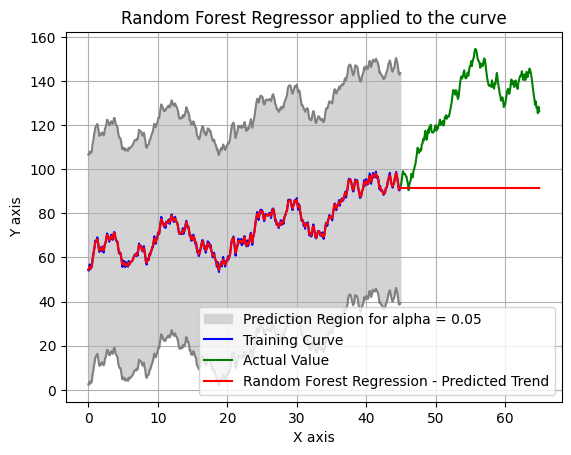

In [300]:
plt.plot(X[:training_subset_length], upper_RF[:training_subset_length], color='grey')
plt.plot(X[:training_subset_length], lower_RF[:training_subset_length], color='grey')
plt.fill_between(X.reshape(-1)[:training_subset_length], upper_RF[:training_subset_length], lower_RF[:training_subset_length], color='lightgrey', label=f'Prediction Region for alpha = {alpha}')
plt.plot(X[:training_subset_length], Y[:training_subset_length], color='b', label='Training Curve')
plt.plot(X[training_subset_length:], Y[training_subset_length:], color='g', label='Actual Value')
plt.plot(X, y_pred_RF, color='r', label='Random Forest Regression - Predicted Trend')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Random Forest Regressor applied to the curve")
plt.grid()
plt.legend()
plt.show()

# Non-linear model to fit the curve - Multi Linear Perceptron Regression

In [301]:
from sklearn.neural_network import MLPRegressor

MLPR = MLPRegressor(hidden_layer_sizes=(1500, 750, 500, 250, 100, 10), activation="relu",
                 solver='adam', alpha=0.0001,
                 batch_size='auto', learning_rate="constant",
                 learning_rate_init=0.001,
                 max_iter=1000,tol=1e-4)
MLPR.fit(X[:training_subset_length], Y[:training_subset_length])


MLPRegressor(hidden_layer_sizes=(1500, 750, 500, 250, 100, 10), max_iter=1000)

In [302]:
y_pred_MLP = MLPR.predict(X)

In [303]:
print(f"R2 score on the trained part of the curve (0 <= X <= 100): {r2_score(Y[:training_subset_length], y_pred_MLP[:training_subset_length])}")
print(f"R2 score on the untrained part of the curve (100 <= X <= 200): {r2_score(Y[training_subset_length:], y_pred_MLP[training_subset_length:])}")

R2 score on the trained part of the curve (0 <= X <= 100): 0.6037272312452291
R2 score on the untrained part of the curve (100 <= X <= 200): -1.8223292243078926


In [304]:
# Prediction region

res = Y - y_pred_MLP
qt = np.quantile(res, 1 - alpha)

upper_MLP = [y_pred_MLP[i] + qt if qt > 0 else y_pred_MLP[i] - qt for i in range(len(y_pred_MLP))]
lower_MLP = [y_pred_MLP[i] - qt if qt > 0 else y_pred_MLP[i] + qt for i in range(len(y_pred_MLP))]

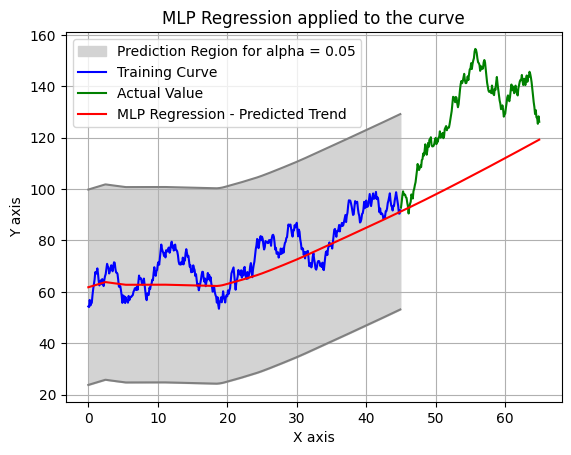

In [305]:
plt.plot(X[:training_subset_length], upper_MLP[:training_subset_length], color='grey')
plt.plot(X[:training_subset_length], lower_MLP[:training_subset_length], color='grey')
plt.fill_between(X.reshape(-1)[:training_subset_length], upper_MLP[:training_subset_length], lower_MLP[:training_subset_length], color='lightgrey', label=f'Prediction Region for alpha = {alpha}')
plt.plot(X[:training_subset_length], Y[:training_subset_length], color='b', label='Training Curve')
plt.plot(X[training_subset_length:], Y[training_subset_length:], color='g', label='Actual Value')
plt.plot(X, y_pred_MLP, color='r', label='MLP Regression - Predicted Trend')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("MLP Regression applied to the curve")
plt.grid()
plt.legend()
plt.show()


The predictions are too hasardous. Sometimes they fit, sometimes not at all. We need to find a more reliable model. Of course, we didn't work on the data itself before, so we can't be expected too good and reliable results.

**Idea: Could be good to mix Random Forest with MLP to obtain a more accurate model. Need to find out how to put all that into an equation to do some forecasting**

### 1. Combining RF and MLP with weights

In [306]:
RF_weight = 0.6

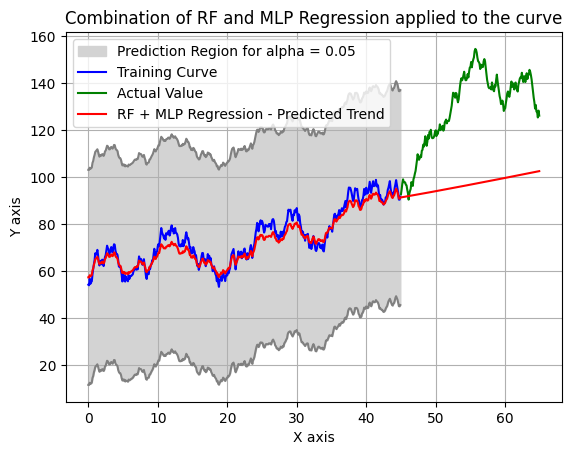

In [309]:
weighted_upper_RF = [RF_weight*i for i in upper_RF]
weighted_upper_MLP = [(1 - RF_weight)*i for i in upper_MLP]
weighted_lower_RF = [RF_weight*i for i in lower_RF]
weighted_lower_MLP = [(1 - RF_weight)*i for i in lower_MLP]

y_pred = RF_weight*y_pred_RF + (1 - RF_weight)*y_pred_MLP

res = Y - y_pred
qt = np.quantile(res, 1 - alpha)

upper = [y_pred[i] + qt if qt > 0 else y_pred[i] - qt for i in range(len(y_pred))]
lower = [y_pred[i] - qt if qt > 0 else y_pred[i] + qt for i in range(len(y_pred))]

plt.plot(X[:training_subset_length], upper[:training_subset_length], color='grey')
plt.plot(X[:training_subset_length], lower[:training_subset_length], color='grey')
plt.fill_between(X.reshape(-1)[:training_subset_length], upper[:training_subset_length], lower[:training_subset_length], color='lightgrey', label=f'Prediction Region for alpha = {alpha}')
plt.plot(X[:training_subset_length], Y[:training_subset_length], color='b', label='Training Curve')
plt.plot(X[training_subset_length:], Y[training_subset_length:], color='g', label='Actual Value')
plt.plot(X, y_pred, color='r', label='RF + MLP Regression - Predicted Trend')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Combination of RF and MLP Regression applied to the curve")
plt.grid()
plt.legend()
plt.show()

The forecasting doesn't work any better. Morover, if the model works well on training data, the prediction region is huge, which means either one of two things:
- The prediction confidence interval calculation is wrong for the combination - TBD
- Combining two models adds much more uncertainty - which is not what we want.